# Titanic Dataset Analysis
###  Mihir Garg

In [1]:
##Importing Libraries
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#Importing Dataset
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Info of Dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#Statistics of Dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Q1. Who were the passengers on the titanic?

In [5]:
#Importing Libraries for Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

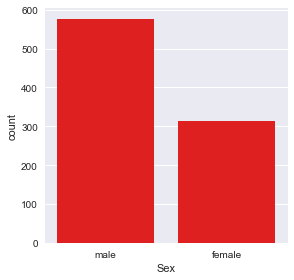

In [6]:
#Count of male and female in dataset
sns.factorplot('Sex',data=titanic,kind='count',color='red')

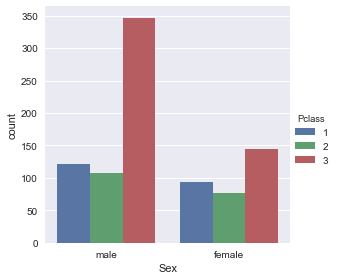

In [7]:
#count of male and female by classes
sns.factorplot('Sex',data=titanic,hue='Pclass',kind='count')

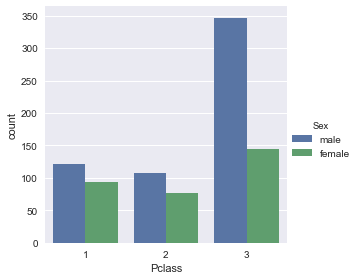

In [8]:
#count of male and female by classes
sns.factorplot('Pclass',data=titanic,hue='Sex',kind='count')

#### What about split between males,females,and children? How can we go about this?

In [9]:
def split(passenger):
    age,sex=passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic['person']=titanic[['Age','Sex']].apply(split,axis=1)
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


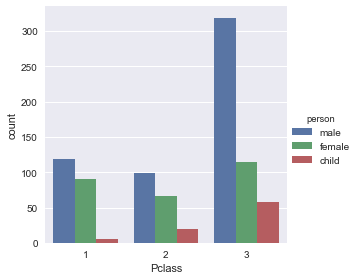

In [11]:
#count of male, female and child by classes
sns.factorplot('Pclass',hue='person',data=titanic,kind='count')

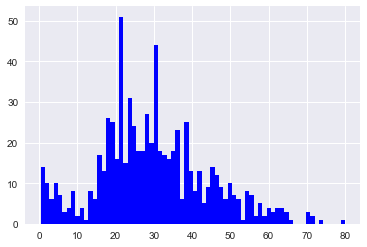

In [12]:
#Distribution of ages (one more method)
titanic['Age'].hist(bins=70,color='blue')

(array([ 14.,  10.,   6.,  10.,   7.,   3.,   4.,   8.,   2.,   4.,   1.,
          8.,   6.,  17.,  13.,  26.,  25.,  16.,  51.,  15.,  31.,  24.,
         18.,  18.,  27.,  20.,  44.,  18.,  17.,  16.,  18.,  23.,   6.,
         25.,  13.,   8.,  13.,   5.,   9.,  14.,  12.,   9.,   6.,  10.,
          7.,   6.,   1.,   8.,   7.,   2.,   5.,   2.,   4.,   3.,   4.,
          4.,   3.,   1.,   0.,   0.,   0.,   3.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.]),
 array([  0.42      ,   1.55685714,   2.69371429,   3.83057143,
          4.96742857,   6.10428571,   7.24114286,   8.378     ,
          9.51485714,  10.65171429,  11.78857143,  12.92542857,
         14.06228571,  15.19914286,  16.336     ,  17.47285714,
         18.60971429,  19.74657143,  20.88342857,  22.02028571,
         23.15714286,  24.294     ,  25.43085714,  26.56771429,
         27.70457143,  28.84142857,  29.97828571,  31.11514286,
         32.252     ,  33.38885714,  34.52571429,  35.66257143,
         3

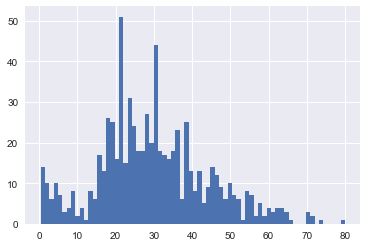

In [13]:
plt.hist(titanic['Age'].dropna(),bins=70)

In [14]:
#mean of ages
titanic['Age'].mean()

29.69911764705882

In [15]:
#count of male, female and child
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

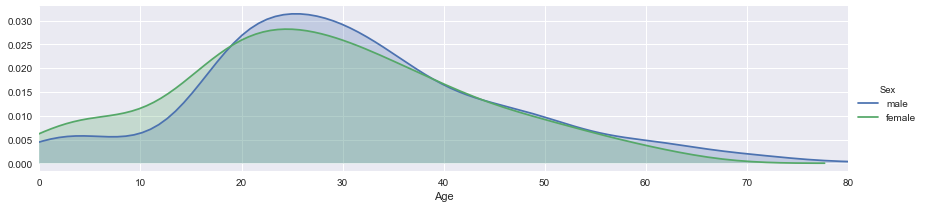

In [16]:
#KDE Plot of age with respect to gender
fig=sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

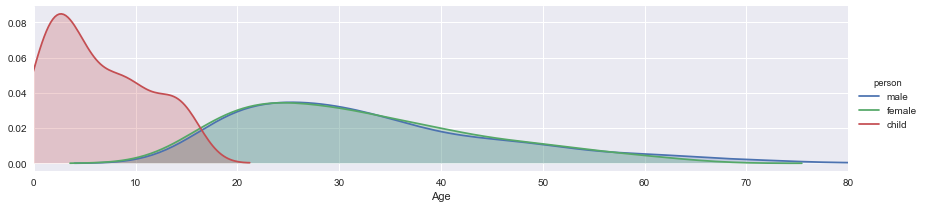

In [17]:
#KDE Plot of age with respect to person
fig=sns.FacetGrid(titanic,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

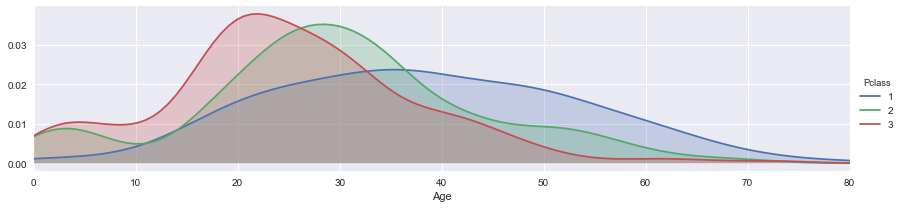

In [18]:
#KDE Plot of age with respect to Pclass
fig=sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

## Q2. What deck were the passengers on and how does that relate to their class?


In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck=titanic['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

#### We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

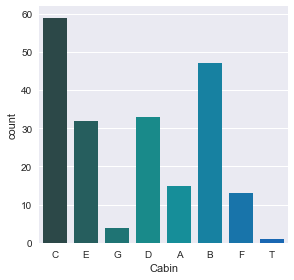

In [22]:
levels = []

for level in deck:
    levels.append(level[0])    

cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin,palette='winter_d',kind='count')

#### We have a 'T' deck value there which doesn't make sense, we can drop it out 

In [23]:
cabin=cabin[cabin.Cabin!='T']

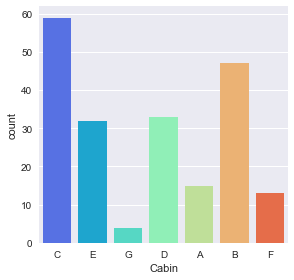

In [24]:
sns.factorplot('Cabin',data=cabin,palette='rainbow',kind='count')

## Q3.) Where did the passengers come from?

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


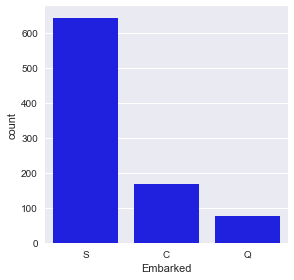

In [26]:
#plot of passengers embarked from different places
sns.factorplot('Embarked',data=titanic,kind='count',color='blue')

C:\Users\mihir_garg\Anaconda3\lib\site-packages\seaborn\categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


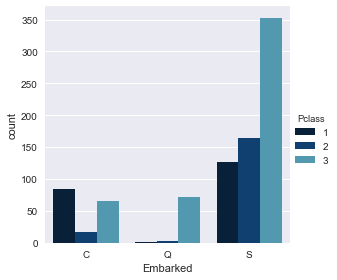

In [27]:
#count of embarkment by classes
sns.factorplot('Embarked',hue='Pclass',data=titanic,kind='count',x_order=['C','Q','S'],palette='ocean')

## Q4. Who was alone and who was with family?

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic['Alone']=titanic.SibSp+titanic.Parch

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [31]:
titanic['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [32]:
titanic['Alone'].loc[titanic['Alone']>0]='With Family'
titanic['Alone'].loc[titanic['Alone']==0]='Alone'

C:\Users\mihir_garg\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


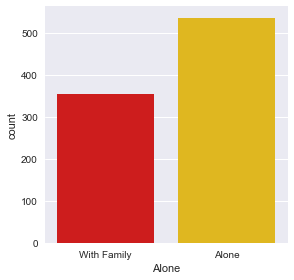

In [34]:
# count of passengers with family or alone
sns.factorplot('Alone',data=titanic,kind='count',palette='hot')

## Q5.What factors helped someone survive the sinking?

In [35]:
titanic['Survivor']=titanic.Survived.map({0:'No',1:'Yes'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


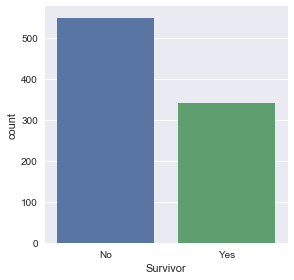

In [36]:
#count of passengers who survived or not
sns.factorplot('Survivor',data=titanic,kind='count')

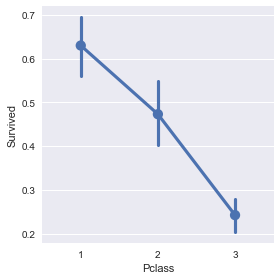

In [37]:
#count of passengers who survived or not by classes
sns.factorplot('Pclass','Survived',data=titanic)

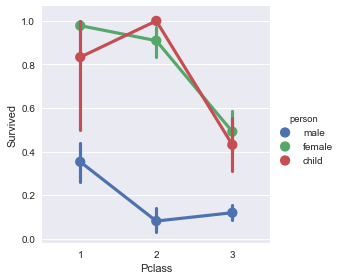

In [38]:
#count of passengers who survived or not by person
sns.factorplot('Pclass','Survived',hue='person',data=titanic)


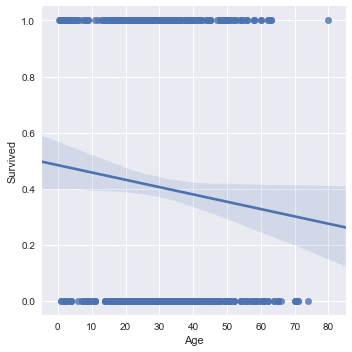

In [39]:
#count of passengers who survived or not with respect to age
sns.lmplot('Age','Survived',data=titanic)

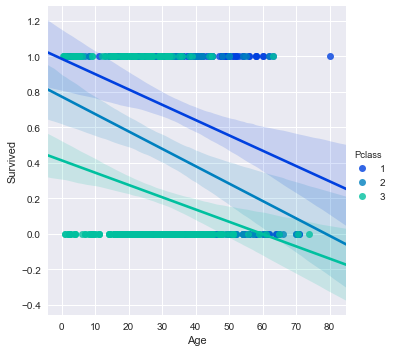

In [40]:
#count of passengers who survived or not with respect to age by classes
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter')

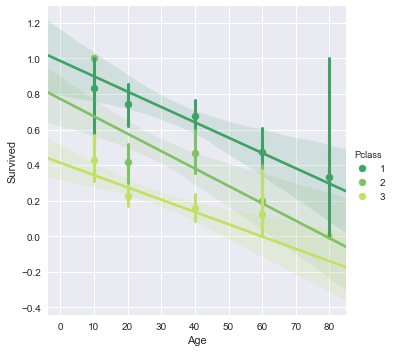

In [41]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='summer',x_bins=generations)

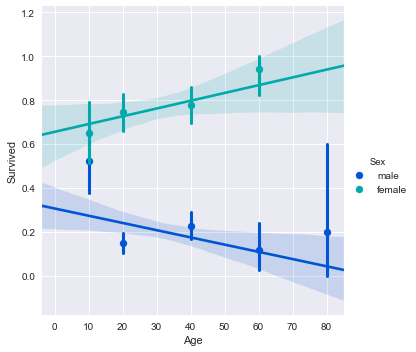

In [42]:
#count of passengers who survived or not with respect to age by gender
sns.lmplot('Age','Survived',hue='Sex',data=titanic,palette='winter',x_bins=generations)

## Q6. Did the deck have an effect on the passengers survival rate?

In [43]:
def decklevel(cabin):
    deck=cabin
    for level in deck:
        levels=level[0]
        return levels
titanic['decklevels'] = titanic[['Cabin']].dropna().apply(decklevel,axis=1)

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,decklevels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,NaN


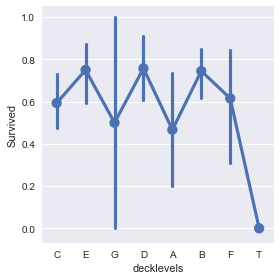

In [45]:
# plot of survivors by decklevels
sns.factorplot('decklevels','Survived',data=titanic)

In [46]:
titanic=titanic[titanic.Cabin!='T']

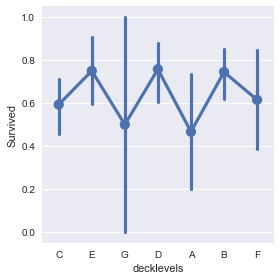

In [47]:
sns.factorplot('decklevels','Survived',data=titanic)

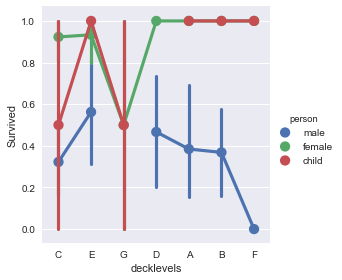

In [48]:
# plot of survivors by decklevels with respect to person
sns.factorplot('decklevels','Survived',hue='person',data=titanic)

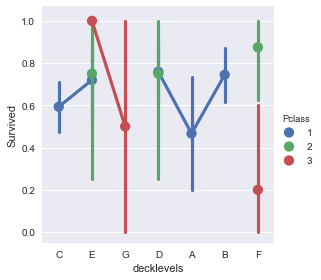

In [49]:
# plot of survivors by decklevels with respect to pclass
sns.factorplot('decklevels','Survived',hue='Pclass',data=titanic)

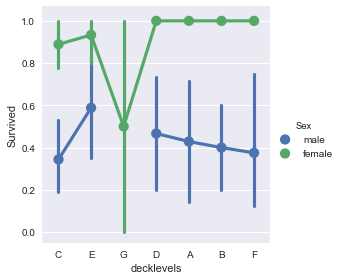

In [50]:
# plot of survivors by decklevels with respect to sex
sns.factorplot('decklevels','Survived',hue='Sex',data=titanic)

## Q7. Did having a family member increase the odds of surviving the crash?


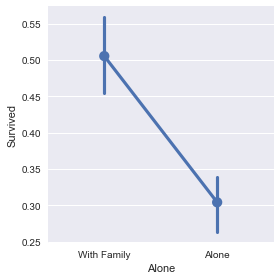

In [51]:
#plot of surviors with family or not
sns.factorplot('Alone','Survived',data=titanic)

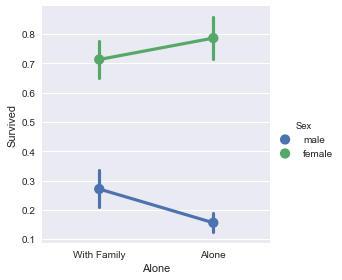

In [52]:
#plot of surviors with family or not by sex
sns.factorplot('Alone','Survived',hue='Sex',data=titanic)

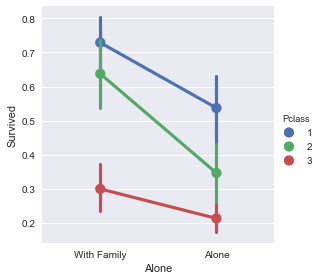

In [53]:
#plot of surviors with family or not by pclass
sns.factorplot('Alone','Survived',hue='Pclass',data=titanic)

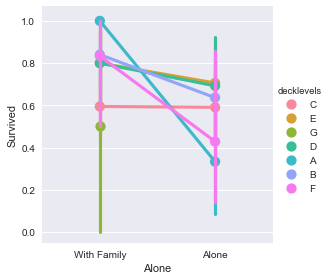

In [54]:
#plot of surviors with family or not by decklevels
sns.factorplot('Alone','Survived',hue='decklevels',data=titanic)